In [185]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pickle import load, dump
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [186]:
dataset: pd.DataFrame = pd.read_csv("./dataset/train.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [187]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [188]:
dataset.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Gender       891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


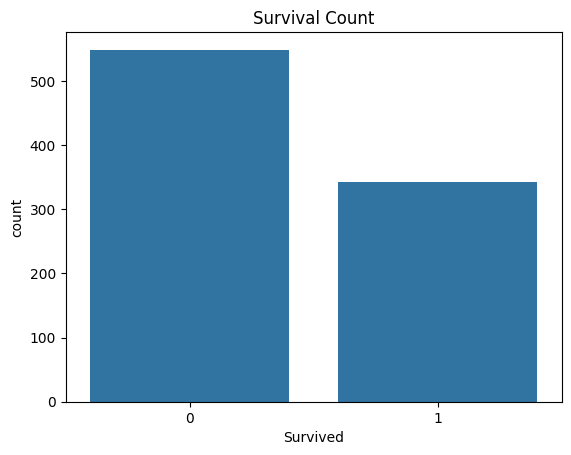

In [189]:
sns.countplot(x='Survived', data=dataset)
plt.title('Survival Count')
plt.show()


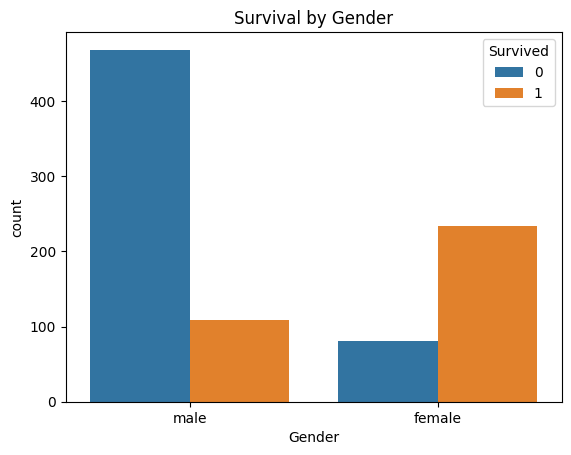

In [190]:
sns.countplot(x="Gender", hue="Survived", data=dataset)
plt.title("Survival by Gender")
plt.show()


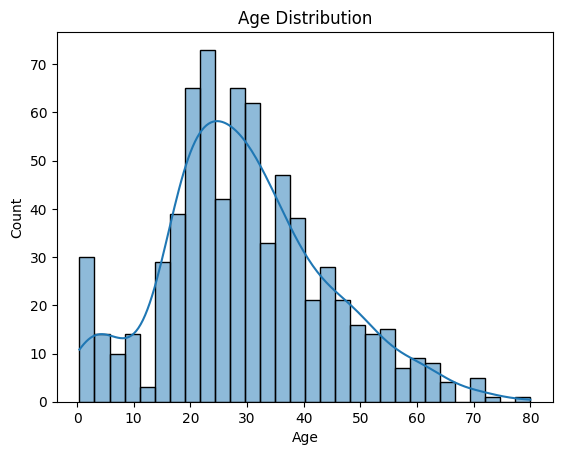

In [191]:
sns.histplot(dataset["Age"], bins=30, kde=True) # type: ignore
plt.title("Age Distribution")
plt.show()


In [192]:
dataset_heatmap = dataset.copy()
le = LabelEncoder()
for col in ["Gender", "Embarked"]:
    dataset_heatmap[col] = le.fit_transform(dataset_heatmap[col].astype(str))


In [193]:
dataset_heatmap.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)


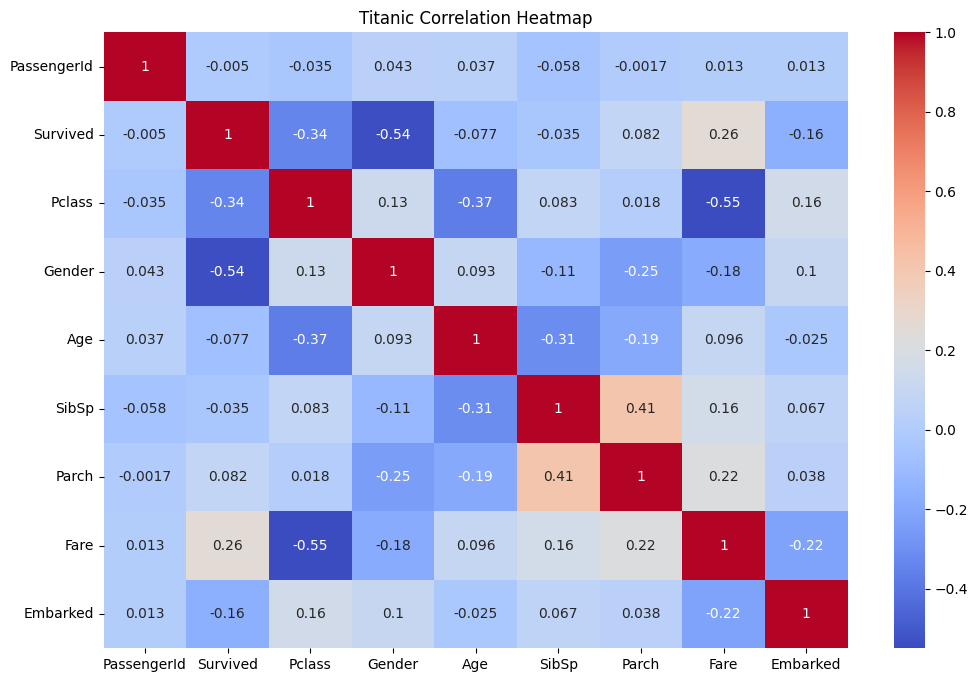

In [194]:
plt.figure(figsize=(12,8))

sns.heatmap(
    dataset_heatmap.corr(),
    annot=True,
    cmap="coolwarm"
)

plt.title("Titanic Correlation Heatmap")
plt.show()


In [195]:
dataset["Age"] = dataset["Age"].fillna(dataset["Age"].median())
dataset["Embarked"] = dataset["Embarked"].fillna(dataset["Embarked"].mode()[0])

In [196]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='str')

In [197]:
dataset = dataset.drop(["Name", "Ticket", "Cabin","PassengerId"], axis=1)
dataset.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [198]:
dataset.isnull().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [199]:
df = pd.get_dummies(dataset)
df.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_female,Gender_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [200]:
df = pd.get_dummies(dataset, drop_first=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [201]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [203]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
331,1,45.5,0,0,28.5000,True,False,True
733,2,23.0,0,0,13.0000,True,False,True
382,3,32.0,0,0,7.9250,True,False,True
704,3,26.0,1,0,7.8542,True,False,True
813,3,6.0,4,2,31.2750,False,False,True
...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,7.6500,False,False,True
270,1,28.0,0,0,31.0000,True,False,True
860,3,41.0,2,0,14.1083,True,False,True
435,1,14.0,1,2,120.0000,False,False,True


In [204]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [205]:
X_train

array([[-1.61413602,  1.25364106, -0.47072241, ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       [-0.40055118, -0.47728355, -0.47072241, ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       [ 0.81303367,  0.21508629, -0.47072241, ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       ...,
       [ 0.81303367,  0.90745614,  1.23056874, ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       [-1.61413602, -1.1696534 ,  0.37992316, ..., -1.38062393,
        -0.30335547,  0.59248936],
       [-1.61413602, -0.63114352, -0.47072241, ...,  0.7243102 ,
        -0.30335547,  0.59248936]], shape=(712, 8))

In [206]:

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)
print("Logistic Accuracy:", accuracy_score(y_test, pred_lr))


Logistic Accuracy: 0.8100558659217877


<Axes: >

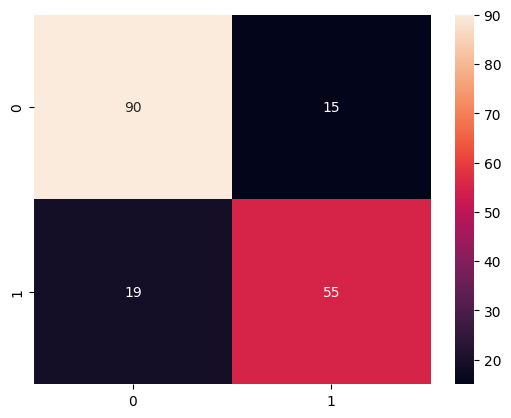

In [207]:
"""
[TN FP
 FN TP]

"""
sns.heatmap(confusion_matrix(y_test, pred_lr), annot=True, fmt="d")


In [208]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, pred_rf))


Random Forest Accuracy: 0.8212290502793296


<Axes: >

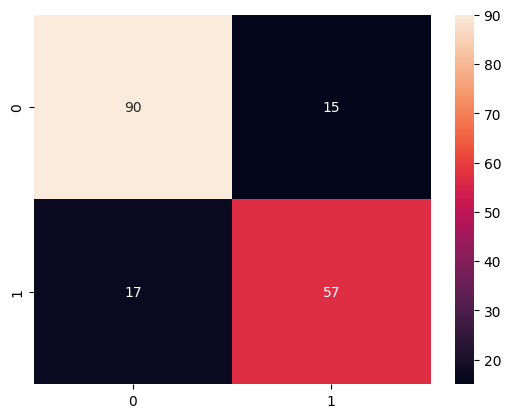

In [209]:

"""
[TN FP
 FN TP]

"""
sns.heatmap(confusion_matrix(y_test, pred_rf), annot=True, fmt="d")


In [ ]:
dump(rf, open("titanic_model.pkl", "wb"))


In [ ]:
from pickle import load
model = load(open("titanic_model.pkl", "rb"))
# scaler = load(open("scaler.pkl", "rb"))
new_passenger = [[3, 22, 1, 0, 7.25, 1, 0, 0]]
# new_passenger_scaled = scaler.transform(new_passenger)

print("Survival Prediction:", model.predict(new_passenger))

Survival Prediction: [0]


d:\Mgit college\college projects\PR\pr\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Competition 

In [268]:
df = pd.read_csv("./dataset/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [269]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [270]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Gender       891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [271]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='str')

In [272]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df = df.drop(["Name", "Ticket", "Cabin","PassengerId"], axis=1)

In [273]:
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [276]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [277]:
X_train = df_encoded.drop("Survived", axis=1)
y_train = df_encoded["Survived"]

In [278]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

In [282]:
df_test = pd.read_csv("./dataset/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [283]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [284]:
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].median())
df_test["Embarked"] = df_test["Embarked"].fillna(df_test["Embarked"].mode()[0])
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].median())
df_test = df_test.drop(["Name", "Ticket", "Cabin","PassengerId"], axis=1)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [285]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [286]:
df_test_encoded = pd.get_dummies(df_test, drop_first=True)

In [287]:
df_test_encoded = df_test_encoded.reindex(columns=X_train.columns, fill_value=0)


In [289]:
X_test_scaled = sc.transform(df_test_encoded)
y_test = pd.read_csv("./dataset/gender_submission.csv")["Survived"]


In [294]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

pred = lr.predict(X_test_scaled)
f"Test Accuracy: {accuracy_score(y_test, pred)*100}"

'Test Accuracy: 37.79904306220095'